In [35]:
"""
Introductory Econometrics with Python

Coded by Carlos Góes (andregoes@gmail.com)
Chief-Research Officer, Instituto Mercado Popular

Last updated on March 20th, 2017
"""

import numpy as np
import statsmodels.formula.api as smf
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
## Search for Keywords from the World Bank Database

print('Searching for Telephone Use:\n\n',
      wb.search('telephone*').iloc[:,:2],
      '\n\n')

print('Searching for GDP per Capita:\n\n',
      wb.search('gdp.*capita*.*const*').iloc[:,:2],
      '\n\n')

Searching for Telephone Use:

                      id                                               name
5817        IC.TEL.DURS  Delay in obtaining a mainline telephone connec...
6001  IT.MLT.3MIN.CD.OP  Price of a 3-minute fixed telephone local call...
6002  IT.MLT.3MIN.CD.PK  Price of a 3-minute fixed telephone local call...
6003  IT.MLT.3MIN.CD.US  Telephone average cost of call to US (US$ per ...
6004  IT.MLT.3MIN.CN.OP  Price of a 3-minute fixed telephone local call...
6005  IT.MLT.3MIN.CN.PK  Price of a 3-minute fixed telephone local call...
6006    IT.MLT.BCONN.CD  Business telephone connection charge (current ...
6007    IT.MLT.BCONN.CN  Business telephone connection charge (current ...
6008     IT.MLT.BSUB.CD  Business telephone monthly subscription (curre...
6009     IT.MLT.BSUB.CN  Business telephone monthly subscription (curre...
6010     IT.MLT.CONN.CD  Residential telephone connection charge (curre...
6011     IT.MLT.CONN.CN  Residential telephone connection charge (cur

In [37]:
# Found the codes you want to manpiulate? Select them

wbcode = ['NY.GDP.PCAP.KD', 'IT.TEL.TOTL.P3']

# Download the data for all countries for one specific year

yeard = 2011

wbdata = wb.download(indicator=wbcode,
                     country='all',
                     start=yeard,
                     end=yeard).dropna()

# Label the columns

wbdata.columns = ['gdppercapita', 'telephones'] 

print(wbdata)

                               gdppercapita   telephones
country                  year                           
Algeria                  2011   4517.844140  1074.904240
Angola                   2011   3905.818053   499.235668
Benin                    2011    733.864893   870.108667
Botswana                 2011   6488.966235  1501.838740
Burkina Faso             2011    595.044214   461.085600
Burundi                  2011    215.708935   226.770495
Cameroon                 2011   1164.852451   556.933469
Central African Republic 2011    452.794425   407.702352
Chad                     2011    867.303098   320.755480
Comoros                  2011    760.205959   318.376853
Congo, Dem. Rep.         2011    322.117465   231.735663
Congo, Rep.              2011   2972.787059   941.834382
Cote d'Ivoire            2011   1154.754406   873.939197
Djibouti                 2011   1400.605596   233.546166
Egypt, Arab Rep.         2011   2659.876419  1116.344037
Eritrea                  2011  

C:\Users\Carlos\Anaconda3\lib\site-packages\seaborn\linearmodels.py:267: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


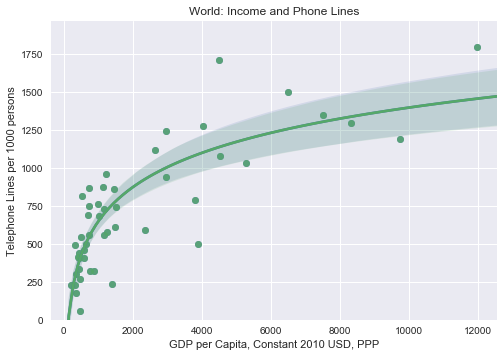

In [38]:
# Plot a figure, and format it

fig = sns.regplot(x=wbdata['gdppercapita'],
                  y=wbdata['telephones'],
                 logx=True)

fig.set(xlabel='GDP per Capita, Constant 2010 USD, PPP',
        ylabel='Telephone Lines per 1000 persons',
        title='World: Income and Phone Lines')

sns.plt.ylim(0,)
sns.plt.show()

In [39]:
# Run a regression

cross_section = smf.ols('telephones ~ np.log(gdppercapita)',
                        data=wbdata,).fit(cov_type='HC3')

print(cross_section.summary())

                            OLS Regression Results                            
Dep. Variable:             telephones   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     90.55
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           1.92e-12
Time:                        00:27:08   Log-Likelihood:                -327.69
No. Observations:                  48   AIC:                             659.4
Df Residuals:                      46   BIC:                             663.1
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -1605.1591 